In [ ]:
#import pandas
import pandas as pd
# radi jednostavnosi dajemo imena kolonama
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
# ova funkcija izlistava prvih 5 redova iz dataseta
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# dijelimo 2 tipa varijabli: zavisne(target varijable) i nezavisne(feature varijable)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [ ]:
# dijelimo dataset u set za treniranje i testiranje
# features, target i test_set size, random_state bira uzorke random
from sklearn.model_selection import train_test_split
# dataset smo podijelili 75:25, 75% podataka se koristi za trening, dok je 25% za testiranje modela
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

Sada cemo importovati model logisticke regresije i kreirate objekat klasifikatora loggisticke regresije sa funkcijom **Logistic Regression()** sa random_state funkcijom zbog ponovljivosti. 

Nakon toga postavljamo nas model na train set korsiteci **fit()** i onda pokrecemo predikciju na test set koristeci **predict()**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Procjena modela korišćenjem Confusion Matrix**

Confusion Matrix je tabela koja se koristi za procjenu klasifikacije modela. Takođe možemo vizualizovati performanse algoritma. Osnova ove matrice je broj tačnih i broj netačnih predviđanja sumirane po klasama.  

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 26,  41]])

Ovdje možemo vidjeti matricu u obliku objekta niza. Njena dimenzija je 2*2 jer je ovaj model 
binarna klasifikacija. Imamo 2 klase 0 i 1. Dijagonalne vrijednosti predstavljaju tačna predviđanja,
dok su ne-dijagonalni elementi netačna predviđanja. Na izlazu 116 i 41 su stvarna predviđanja,
dok su 26 i 9 netačna predviđanja.

VIZUALIZACIJA CONFUSION MATRIX-a koristeći HEATMAP
Za vizualizaciju koristimo matplotlib i seaborn

Text(0.5, 257.44, 'Predicted label')

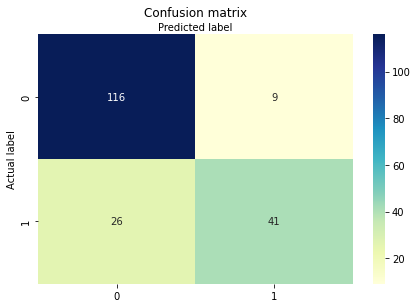

In [ ]:
from typing import Text
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Metrike procjene Confusion Matrix-a
Procjenu ćemo izvršiti pomoću classification_report za preciznost i tačnost.

In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



Ocjena klasifikacije je 82% što se smatra dobrom preciznosti.

Preciznost pokazuje koliko je naš model tačan, odnosno možemo reći kada model napravi predviđanje, kolliko često je ono tačno. U slučaju ovog predviđanja, kada je model logističke regresije predvidio da če pacijenti patiti od dijabetesa, ti pacijenti ga imaju 82% vremena.

Recall - ako postoje pacijenti koji imaju dijabetesu u setu testova, naš model Logističke regresije ga može identifikovati 61% vremena. 


ROC kriva - Receiver Operating Characteristic
- dijagram prave pozitivne stope u odnosu na lažno pozitivnu stopu. Pokaczuje kompromis između osjetljivosti i specifičnosti.

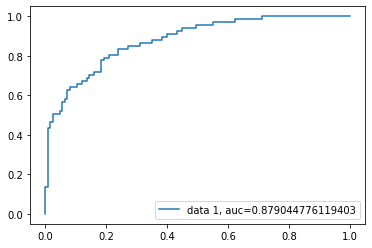

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC rezultat za slučaj je 0.88. AUC rezultat 1 predstavlja savršen klasifikator, a 0.5 bezvrijedni klasifikator.

REFERENCA: https://www.datacamp.com/tutorial/understanding-logistic-regression-python